### Column Description

| Variável 	| Descrição 	|
|:-:	|:-	|
| PassangerID 	| ID de identificação do passageiro(a) 	|
| Survived 	| se o passageiro(a) sobreviveu (0 = não, 1 = sim) 	|
| Pclass 	| classe do passageiro:<br>     * **1 = primeira**,<br>     * **2 = segunda**,<br>     * **3 = terceira** 	|
| name 	| nome do passageiro(a) 	|
| sex 	| sexo do passageiro(a) 	|
| age 	| idade do passageiro(a) 	|
| Sibsp 	| número de irmão(ãs)/esposo(a) à bordo 	|
| Parch 	| número de pais/filhos(as) à bordo 	|
| Ticket 	| número da passagem 	|
| Fare 	| preço da passagem 	|
| Cabin 	| cabine 	|
| Embarked 	| local que o passageiro(a) embarcou:<br>     * **C = Cherboug**,<br>     * **Q = Queenstown**,<br>     * **S = Southamption** 	|
| WikiId 	| ID de identificação do passageiro(a) segundo Wikipedia 	|
| Name_wiki 	| nome do passageiro(a) 	|
| Age_wiki 	| idade do passageiro(a) 	|
| Hometown 	| cidade de nascimento do passageiro(a) 	|
| Boarded 	| cidade de embarque 	|
| Destination 	| destino da viagem 	|
| Lifeboat 	| identificação do bote salva-vidas 	|
| Body 	| número de identificação do corpo 	|


<font color='red'>**IMPORTANT**</font>

The new features (the ones after 'Embarked') are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.

### Intalling libs

In [1]:
# pip install seaborn --upgrade

### Importing Libs

In [2]:
# data visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import (
    jointplot,
    pairplot,
    boxplot
)
from yellowbrick.features import (
    JointPlotVisualizer,
    Rank2D
)

# data manipulation
import numpy as np
import pandas as pd
import janitor as jn
from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    ensemble,
    preprocessing,
    tree,
    impute,
    model_selection
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression
)

from sklearn.tree import (
    DecisionTreeClassifier
)

from sklearn.neighbors import (
    KNeighborsClassifier
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC
)

from sklearn.ensemble import (
    RandomForestClassifier
)

import xgboost

# data model metrics
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

from yellowbrick.model_selection import (
    LearningCurve
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Reading the Titanic Dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv", index_col=0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Deleting _Class_ feature at the end
We are deleting because is the same as _pclass_ (same result, same data)

In [4]:
df = df.drop('Class', axis = 'columns')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Converting DataFrame Column Names to Lowercase snakecase

In [5]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

df

,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Preparing the dataset

In [6]:
# dropping columns taht do not add value
df = df.drop(columns = ['name',
                        'name_wiki',
                        'wiki_id',
                        'hometown',
                        'destination',
                        'ticket',
                        'lifeboat',
                        'body',
                        'cabin',
                        'age'])

# using get_dummies function to convert object to int
df = pd.get_dummies(df)

# dropping redundant features
df = df.drop(columns = ['sex_male'])

#remove rows with any values that are not finite (NaN or infite)
df = df[np.isfinite(df).all(1)]

# converting age_wiki to int
df["age_wiki"] = df['age_wiki'].astype(int)

# converting fare to int
df["fare"] = df['fare'].astype(int)

# first, we need to create a series of the target feature
y = df.survived

# then, we create a DataFrame with the attributes
X = df.drop(columns = ['survived'])

### Data exploring
<div class="alert alert-block alert-info">
<b>Note:</b> By understanding business and data, we can create better models and make better business impacts through data-driven decision making.
<div class="alert alert-block alert-success">
<b>Must do:</b> Before creating our prediction models, an extremely important and necessary step is to explore the data. This will give us in-depth knowledge of the data, as well as inputs to understand the Business and discuss best application practices.
</div>
</div>

#### Data size
Applying .shape from Pandas will return a tuple of the number of rows and columns

In [7]:
df.shape

(887, 14)

__This dataset contains 1.309 rowns and 20 columns.__

#### Summary statistics about the data
<div class="alert alert-block alert-info">
<b>Note:</b> Note that the describe function, by default, only chooses numeric data.
</div>

We can use Pandas to obtain the summary statistics of our dataset. The .describe() method will be applied:
- __count:__ counts of filled data;
- __mean:__ average of the data in that column;
- __std__: measure of dispersion around the population mean of a random variable;
- __min__: minimum of the register;
- __25%__: lower quartile
- __50%__: central quartile
- __75%__: upper quartile
- __max__: maximum of the register;

In [8]:
df.describe()

,survived,pclass,sib_sp,parch,fare,age_wiki
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.384442,2.307779,0.524239,0.383315,31.639233,29.317926
std,0.486738,0.835834,1.104694,0.807466,49.365095,13.938690
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.000000,20.000000
50%,0.000000,3.000000,0.000000,0.000000,14.000000,28.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,38.000000
max,1.000000,3.000000,8.000000,6.000000,512.000000,74.000000


#### iloc attribute
This attribute allows us to select rows and columns based on the position of the indexes.

<div class="alert alert-block alert-info">
<b>Note:</b> We pass the position of the rows in the form of a scalar, a list, or slice, and then we can add a comma and pass the position of the columns in the form of a scalar, a list, or a slice.
<div class="alert alert-block alert-warning">
<b>Note:</b> For example, below we will extract the second and fifth rows, and the last three columns.
</div>
</div>

In [9]:
df.iloc[[1, 4], -3:]

,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton
PassengerId,,,
2,True,False,False
5,False,False,True


#### loc attribute
This attribute allows us to select rows and columns based on the names.

In [10]:
df.loc[[2, 5], "parch":]

,parch,fare,age_wiki,sex_female,embarked_C,embarked_Q,embarked_S,boarded_Belfast,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton
PassengerId,,,,,,,,,,,
2,0,71,35,True,True,False,False,False,True,False,False
5,0,8,35,False,False,False,True,False,False,False,True


### Histogram
<div class="alert alert-block alert-info">
<b>Histogram</b> is a great tool for visualizing numerical data.
</div>

<AxesSubplot:ylabel='Frequency'>

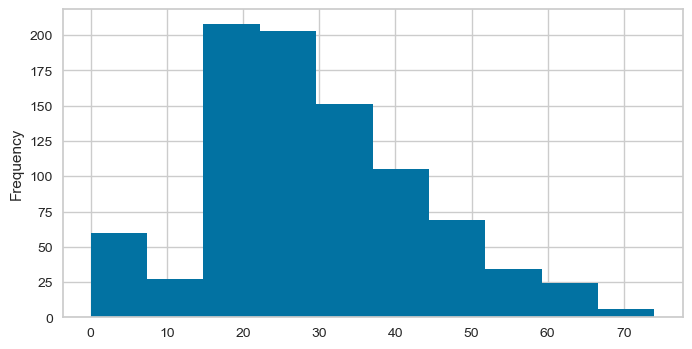

In [11]:
# we can select one of the variables to see the distribution - 'age_wiki'
fig, ax = plt.subplots(figsize = (8, 4))
df.age_wiki.plot(kind = "hist", ax = ax)

<AxesSubplot:ylabel='Frequency'>

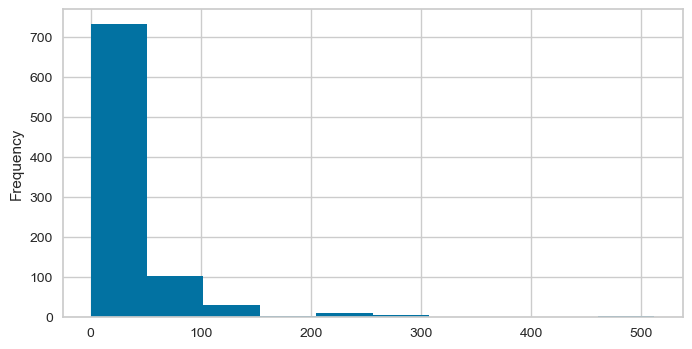

In [12]:
# we can select one of the variables to see the distribution - 'fare'
fig, ax = plt.subplots(figsize = (8, 4))
df.fare.plot(kind = "hist", ax = ax)

### Scatter plot
We can use a scatter plot between two numerical columns, to visually understand if there is any correlation between them.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age_wiki', ylabel='fare'>

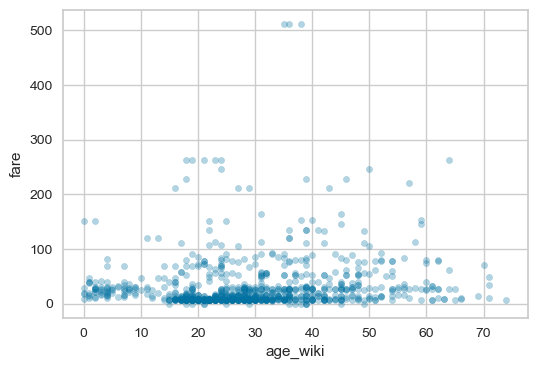

In [13]:
fig, ax = plt.subplots(figsize = (6, 4))
df.plot.scatter(
    x = 'age_wiki', y = 'fare', ax = ax, alpha = 0.3
)

As we can see, there is no clear correlation between the variables of age and ticket price. To make sure, we can use the __Pearson correlation__ between the columns through the .corr() method.

### Peasron correlation

In [14]:
df.age_wiki.corr(df.fare)

0.12052746702129014

Again, we can see that the __Pearson correlation__ is low. For comparison analyses:
- 0.9 is very strong correlation
- 0.7 to 0.9 is strong correlation
- 0.5 to 0.7 is moderate
- 0.3 to 0.5 is weak

#### Let's do the same with pclass and survived features

In [15]:
df.survived.corr(df.pclass)

-0.34110585295858453

#### Again, with parch and survived

In [16]:
df.survived.corr(df.parch)

0.08124117768238026

### Join plot
Yellowbrick has a more sophisticated chart type, with histograms on the sides.<br>
__Remember__ that to use this chart, variables cannot contain NaN or NULL

In [17]:
# drop rows that has NaN values on selected columns
df = df.dropna(subset=['age_wiki','fare', 'survived'])

df.isnull().sum()

survived               0
pclass                 0
sib_sp                 0
parch                  0
fare                   0
age_wiki               0
sex_female             0
embarked_C             0
embarked_Q             0
embarked_S             0
boarded_Belfast        0
boarded_Cherbourg      0
boarded_Queenstown     0
boarded_Southampton    0
dtype: int64

JointPlot(ax=<AxesSubplot:xlabel='x', ylabel='y'>)

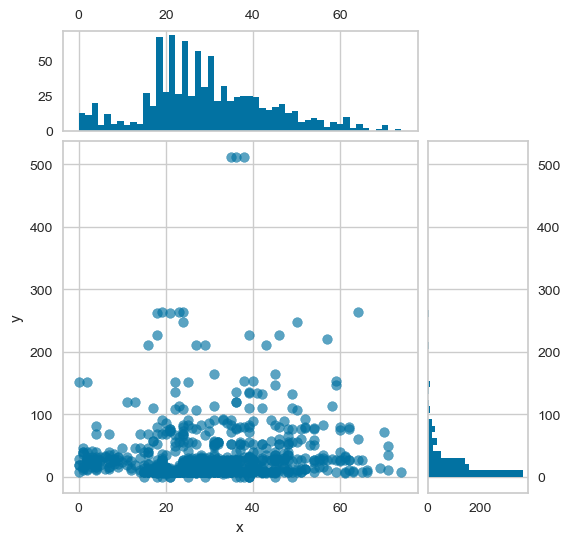

In [18]:
fig, ax = plt.subplots(figsize = (6, 6))
jpv = JointPlotVisualizer(
    feature = "age_wiki", target = "fare"
)

jpv.fit(df["age_wiki"], df["fare"])

With the Seaborn library, we can generate a matrix of pairs, in which some selected variables behave with each other and according to the target feature

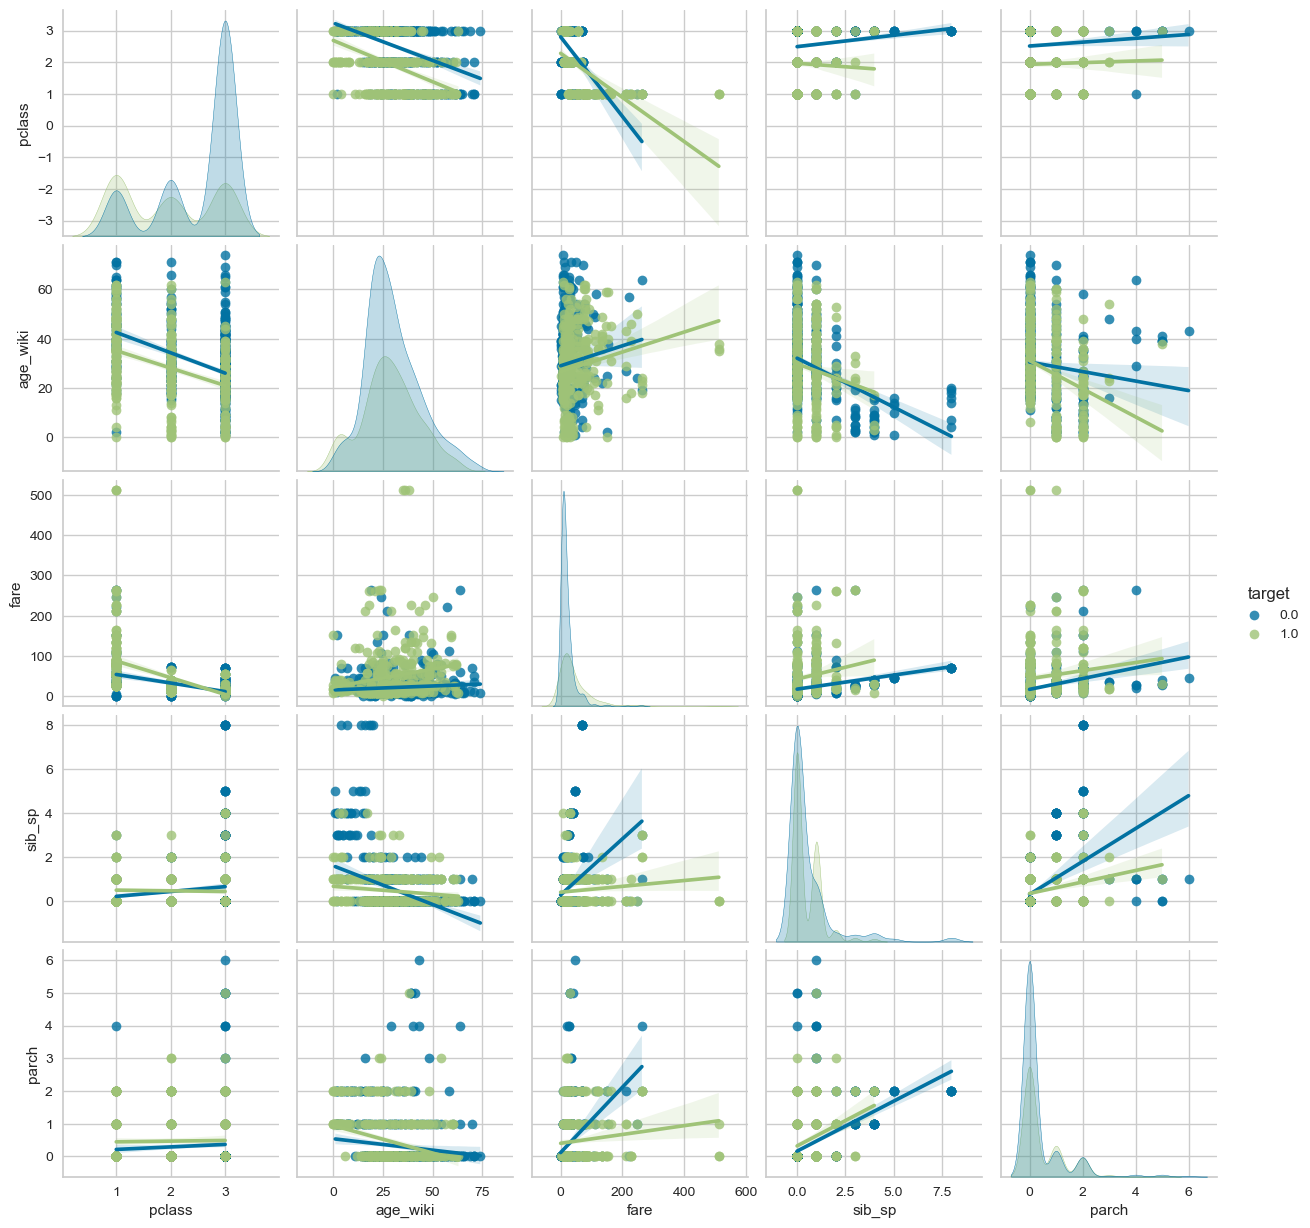

In [19]:
# copying the X dataframe
new_df = X.copy()
new_df["target"] = y

vars = ["pclass", "age_wiki", "fare", "sib_sp", "parch"]
p = pairplot(
    new_df, vars = vars, hue = "target", kind = "reg"
)

### Box plot

In descriptive statistics, box diagram, diagram of extremes and quartiles, boxplot or box plot is a graphical tool to represent the variation in observed data of a numerical variable through quartiles.

<AxesSubplot:xlabel='target', ylabel='age_wiki'>

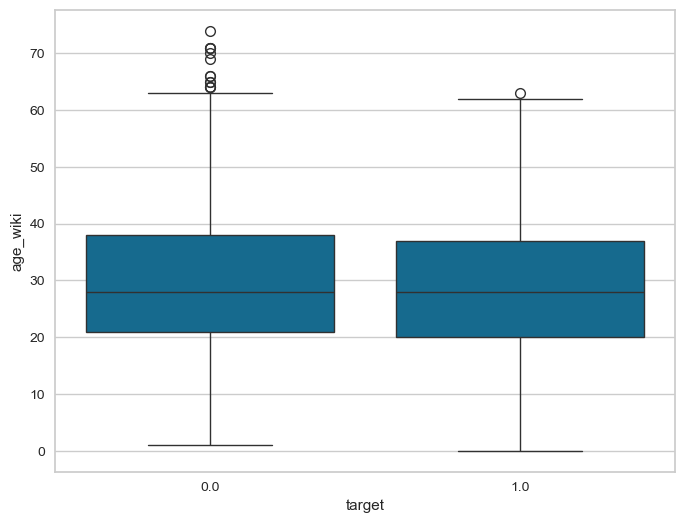

In [20]:
fig, ax = plt.subplots(figsize = (8, 6))

# copying the X dataframe
new_df = X.copy()

new_df["target"] = y
boxplot(x = "target", y = "age_wiki", data = new_df)

We can see that there is no difference in the ages of those who survived and those who did not. The distribution of the 'age_wiki' variable is similar

#### Let's do the same with other variables

In [21]:
# getting the variavle types
new_df.dtypes

pclass                   int64
sib_sp                   int64
parch                    int64
fare                     int64
age_wiki                 int64
sex_female                bool
embarked_C                bool
embarked_Q                bool
embarked_S                bool
boarded_Belfast           bool
boarded_Cherbourg         bool
boarded_Queenstown        bool
boarded_Southampton       bool
target                 float64
dtype: object

<AxesSubplot:xlabel='target', ylabel='parch'>

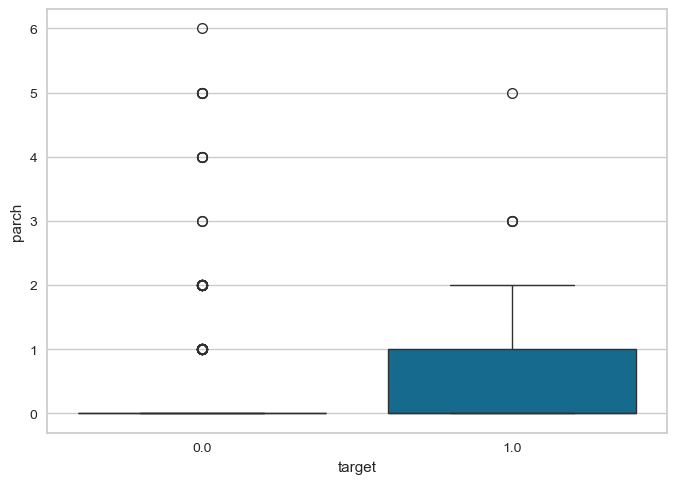

In [22]:
# parch
new_df["target"] = y
boxplot(x = "target", y = "parch", data = new_df)

For the number of parents and children, we can see that the distribution of passengers of those who survived have family members on board

### Comparing two Ordinal Categories

In this case, we will compare the age quantiles with the class groups

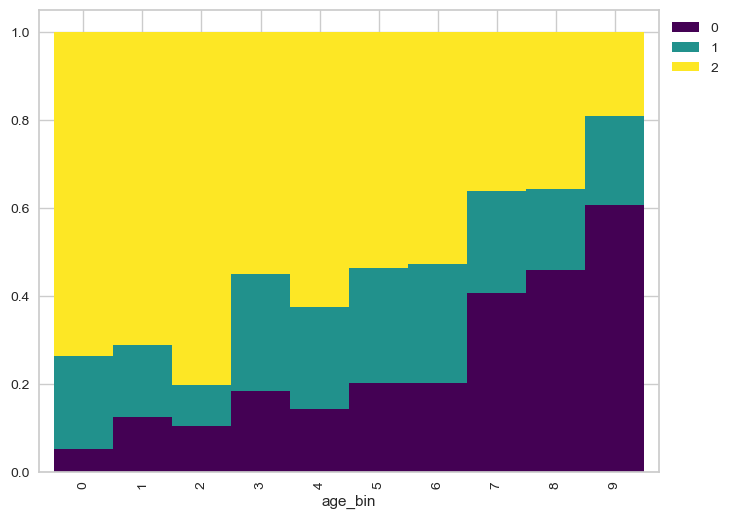

In [23]:
fig, ax = plt.subplots(figsize = (8, 6))
(
    X.assign(
        age_bin = pd.qcut(
            X.age_wiki, q = 10, labels = False
        ),
        class_bin = pd.cut(
            X.pclass, bins = 3, labels = False
        ),
    )
    .groupby(['age_bin', 'class_bin'])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis = 0))
    .plot.bar(
        stacked = True,
        width = 1, 
        ax = ax, cmap = 'viridis'
    )
    .legend(bbox_to_anchor = (1, 1))
)

Here we can see that in the 40% quartile, the majority of tickets were third class

We can compare age with ticket price

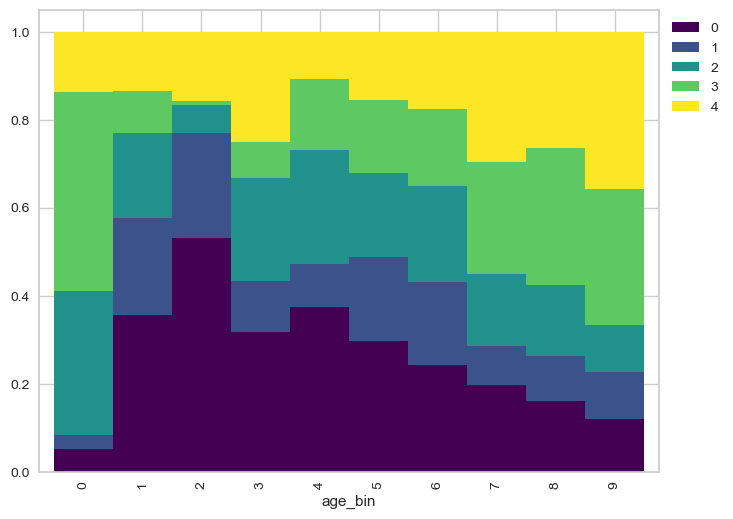

In [24]:
fig, ax = plt.subplots(figsize = (8, 6))
(
    X.assign(
        age_bin = pd.qcut(
            X.age_wiki, q = 10, labels = False
        ),
        class_bin = pd.qcut(
            X.fare, q = 5, labels = False
        ),
    )
    .groupby(['age_bin', 'class_bin'])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis = 0))
    .plot.bar(
        stacked = True,
        width = 1, 
        ax = ax, cmap = 'viridis'
    )
    .legend(bbox_to_anchor = (1, 1))
)

### Correlation
Correlation analysis plays an important role in data analysis and science, as it can be useful as an indication of predictable relationships between variables, which can be explored in a practical way.

First, we will convert float type to int64

In [25]:
# converting age_wiki to int
X["intage_wiki"] = X['age_wiki'].astype(int)

# converting fare to int
X["intfare"] = X['fare'].astype(int)

# dropping the float features
X = X.drop(columns = ["age_wiki", "fare"])
X

,pclass,sib_sp,parch,sex_female,embarked_C,embarked_Q,embarked_S,boarded_Belfast,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton,intage_wiki,intfare
PassengerId,,,,,,,,,,,,,
1,3,1,0,False,False,False,True,False,False,False,True,22,7
2,1,1,0,True,True,False,False,False,True,False,False,35,71
3,3,0,0,True,False,False,True,False,False,False,True,26,7
4,1,1,0,True,False,False,True,False,False,False,True,35,53
5,3,0,0,False,False,False,True,False,False,False,True,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,0,0,False,False,False,True,False,False,False,True,27,13
888,1,0,0,True,False,False,True,False,False,False,True,19,30
889,3,1,2,True,False,False,True,False,False,False,True,7,23


In [26]:
X.dtypes

pclass                 int64
sib_sp                 int64
parch                  int64
sex_female              bool
embarked_C              bool
embarked_Q              bool
embarked_S              bool
boarded_Belfast         bool
boarded_Cherbourg       bool
boarded_Queenstown      bool
boarded_Southampton     bool
intage_wiki            int64
intfare                int64
dtype: object

AttributeError: 'float' object has no attribute 'shape'

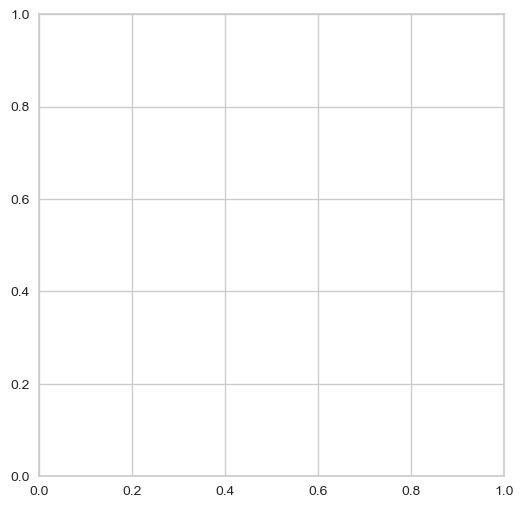

In [27]:
fig, ax = plt.subplots(figsize = (6, 6))
pcv = Rank2D(
    features = X.columns, algorithm = "pearson"
)

pcv.fit(X, y)
pcv.transform(X)
pcv.proof()